In [42]:
from trainer import SSMTrainer
import torch as T

device = T.device("cuda" if T.cuda.is_available() else "cpu")
ssm_trainer = SSMTrainer(
    env='CartPole-v1',
    embedding_size=64,
    state_space_size=256,
    reward_threshold=15,
    reward_target=475,
    lr=2e-4,
    gamma=0.95,
    entropy_coefficient=0.02,
    validation_length=100,
    max_episode_time=500,
    dir='cartpole_ssm_only',
    device=device
    )

In [43]:
ssm_trainer.train()

Episode 1: Reward = 38.0 | Validation Avg = 14.00 from 1 episodes 
Episode 2: Reward = 34.0 | Validation Avg = 15.00 from 1 episodes 
Episode 3: Reward = 27.0 | Validation Avg = 38.00 from 1 episodes 
Episode 4: Reward = 15.0 | Validation Avg = 22.00 from 1 episodes 
Episode 5: Reward = 19.0 | Validation Avg = 68.00 from 1 episodes 
Episode 6: Reward = 15.0 | Validation Avg = 31.00 from 1 episodes 
Episode 7: Reward = 40.0 | Validation Avg = 14.00 from 1 episodes 
Episode 8: Reward = 35.0 | Validation Avg = 17.00 from 1 episodes 
Episode 9: Reward = 22.0 | Validation Avg = 13.00 from 1 episodes 
Episode 10: Reward = 14.0
Episode 11: Reward = 85.0 | Validation Avg = 16.00 from 1 episodes 
Episode 12: Reward = 21.0 | Validation Avg = 10.00 from 1 episodes 
Episode 13: Reward = 38.0 | Validation Avg = 11.00 from 1 episodes 
Episode 14: Reward = 19.0 | Validation Avg = 12.00 from 1 episodes 
Episode 15: Reward = 9.0
Episode 16: Reward = 20.0 | Validation Avg = 10.00 from 1 episodes 
Episod

In [44]:
ssm_trainer.replay_live()

Live Replay Episode Reward: 500.0


In [45]:
df = ssm_trainer.compile_data()

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

df.head()

,recurrent_block.real_transition_matrix,recurrent_block.img_transition_matrix,recurrent_block.real_hidden_matrix,recurrent_block.img_hidden_matrix,recurrent_block.embedding_layer.weight,recurrent_block.output_gate.weight,recurrent_block.input_gate.0.weight,recurrent_block.input_gate.1.smoothness,recurrent_block.discretization_matrix.0.weight,recurrent_block.discretization_matrix.1.smoothness,...,recurrent_block.state_prediction.0.weight,recurrent_block.state_prediction.0.bias,recurrent_block.state_prediction.1.weight,recurrent_block.state_prediction.1.bias,recurrent_block.state_prediction.3.weight,recurrent_block.state_prediction.3.bias,training_steps,training_reward,validation_reward,loss
0,9.393504e-07,0.000015,0.000034,0.000018,0.010218,0.001025,0.023397,0.000561,0.000001,5.405617e-07,...,0.330722,0.229934,0.023587,0.023638,0.263372,0.071078,38,38.0,14.0,-0.301961
1,1.343454e-06,0.000022,0.000040,0.000022,0.017166,0.001016,0.024280,0.000348,0.000003,5.726511e-07,...,0.335709,0.228480,0.024406,0.024060,0.271194,0.074512,72,34.0,15.0,-0.669200
2,1.807187e-06,0.000032,0.000059,0.000033,0.007281,0.001964,0.026358,0.001208,0.000006,1.451157e-06,...,0.334833,0.224645,0.024106,0.024284,0.272520,0.072340,99,27.0,38.0,-0.277224
3,1.360586e-06,0.000023,0.000090,0.000048,0.018567,0.002681,0.038202,0.001929,0.000007,2.474853e-06,...,0.335188,0.228648,0.024852,0.023749,0.273912,0.074791,114,15.0,22.0,-0.397225
4,9.643242e-07,0.000017,0.000053,0.000030,0.011685,0.001539,0.011345,0.000154,0.000005,1.253701e-06,...,0.331049,0.227498,0.023240,0.024246,0.264774,0.070801,133,19.0,68.0,-0.290412


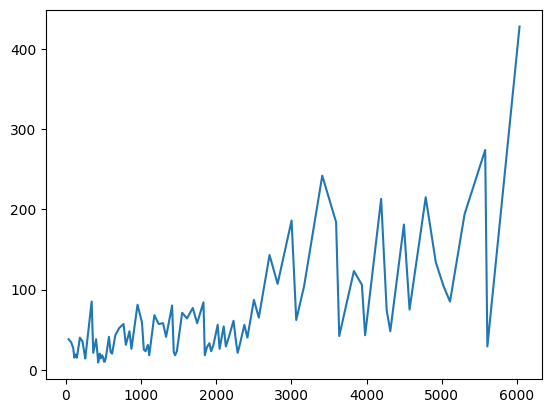

In [47]:
plt.plot(df['training_steps'],df['training_reward'])

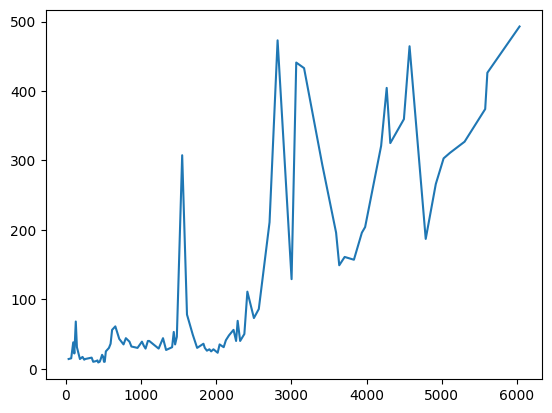

In [48]:
plt.plot(df['training_steps'],df['validation_reward'])

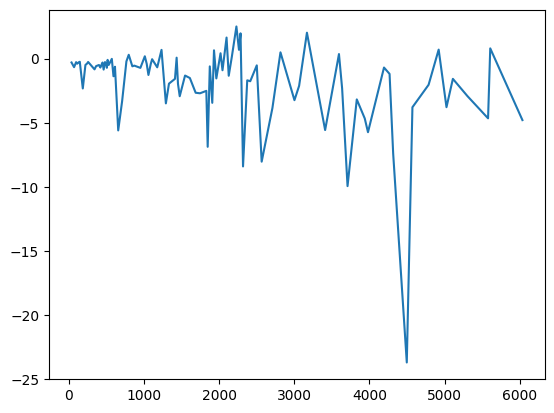

In [49]:
plt.plot(df['training_steps'],df['loss'])

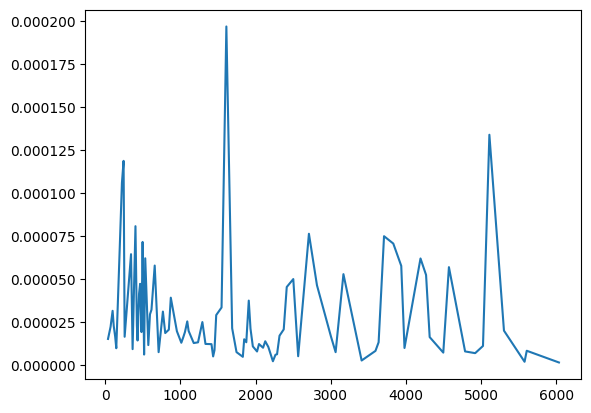

In [50]:
plt.plot(df['training_steps'],df['recurrent_block.img_transition_matrix'])

In [51]:
df['training_steps']

0       38
1       72
2       99
3      114
4      133
      ... 
88    5110
89    5304
90    5578
91    5607
92    6035
Name: training_steps, Length: 93, dtype: int64